<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>CRISP-DM Methodology- modeling</h1>



# Prepare Environment

Upload your data tip:
Run git command in Colab: https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9

## Explore!

## Getting Started

There is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:
According to PEP8 naming convention

In [0]:
# Python libraries
import math
import re
import datetime


# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline   

# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline#answer-43028034
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 15 , 10



In [0]:
def plot_distribution0( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set(xlim= (0 , df[ var ].max() ) )
    facet.add_legend()
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 2000  , df[ var ].max() ) )
    facet.add_legend()
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

def histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( df[ var ].min() , df[ var ].max() ) )
    facet.add_legend()

def categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

### Data Loading

In [5]:
!rm -r learner
!git clone https://github.com/cnukaus/learner.git
!ls

rm: cannot remove 'learner': No such file or directory
Cloning into 'learner'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 312 (delta 30), reused 46 (delta 24), pack-reused 256
Receiving objects: 100% (312/312), 33.03 MiB | 36.41 MiB/s, done.
Resolving deltas: 100% (146/146), done.
learner  sample_data


### Get field type information

In [44]:

  
df = pd.read_csv('learner/lecture03/v2AviationData.csv', sep=',', header=0, encoding = 'iso-8859-1')
df['fatal']=df['Total_Fatal_Injuries'].apply(lambda d:1 if d>0 else 0)
df[df['fatal']==1]
df['TARGET']=df[['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured']].apply(lambda d:1 if (d[2]+d[3])*(d[1]+d[0])>0 else 0,axis=1)
df[df['TARGET']==1].count()
#*(d['Total_Serious_Injuries']+d['Total_Minor_Injuries']+d['Total_Uninjured'])
#df_train=df[:10000]
#df_train.sample(5)


#df.info  , parse_dates=['click_time']

Event_Id                  38
Investigation_Type        38
Accident_Number           38
Event_Date                38
Location                  38
Country                   38
Latitude                  32
Longitude                 32
Airport_Code              23
Airport_Name              25
Injury_Severity           38
Aircraft_Damage           35
Aircraft_Category         37
Registration_Number       31
Make                      38
Model                     38
Amateur_Built             37
Number_of_Engines         32
Engine_Type               31
FAR_Description           37
Schedule                  11
Purpose_of_Flight         26
Air_Carrier                4
Total_Fatal_Injuries      38
Total_Serious_Injuries    38
Total_Minor_Injuries      38
Total_Uninjured           38
Weather_Condition         32
Broad_Phase_of_Flight     29
Report_Status             38
Publication_Date          36
fatal                     38
TARGET                    38
dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

clf = DecisionTreeClassifier()

feature_cols = ['Number_of_Engines','Weather_Condition','Aircraft_Damage','Purpose_of_Flight','Country']
X =df[feature_cols] # Features
y = df.TARGET 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: ignored

In [105]:
X['Weather_Condition'].unique()
X['Number_of_Engines'].unique()
X.head(13)
X.shape[0]

22134

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


X=X.astype(str).apply(le.fit_transform)

#Run again now!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [123]:
print(df.loc[18102])
#print(X_test.join(y_test).count())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Event_Id                                 20080515X00674
Investigation_Type                             Accident
Accident_Number                              SEA08LA134
Event_Date                                   2008-05-12
Location                              Coeur d'Alene, ID
Country                                   United States
Latitude                                        47.7742
Longitude                                      -116.819
Airport_Code                                        COE
Airport_Name                 Coeur d'Alene Air Terminal
Injury_Severity                               Non-Fatal
Aircraft_Damage                             Substantial
Aircraft_Category                              Airplane
Registration_Number                              N5885C
Make                      Hawker Beechcraft Corporation
Model                                              E-55
Amateur_Built                                        No
Number_of_Engines                               

11

In [125]:
print("Balance Accuracy:",metrics.balanced_accuracy_score(y_test, y_pred) ,"Precision ",metrics.precision_score(y_test, y_pred))
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support      
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix of %d Xtest records:, Index is Actual value, Column is Predicted" % (X_test.shape[0])   )  

print(cm)

print("Actual target count:%d" % (y_test.sum()))

Balance Accuracy: 0.49984917043740573 Precision  0.0
confusion matrix of 6641 Xtest records:, Index is Actual value, Column is Predicted
[[6628    2]
 [  11    0]]
Actual target count:11


       FALSE  TRUE
FALSE   6628     2
TRUE      11     0


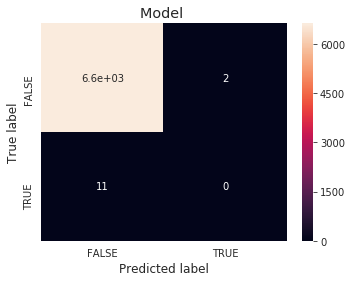

In [120]:
 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['FALSE','TRUE'], 
                     columns = ['FALSE','TRUE'])
print(cm_df)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Model '.format( metrics.confusion_matrix(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

In [0]:
calc_iv(df_train,'Make','fatal')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


(0.34726620109184986,
      Variable                        Value  ...       WoE        IV
 0        Make                    177MF LLC  ...  0.000000  0.000000
 1        Make                       3XTRIM  ...  0.000000 -0.000000
 2        Make                   781569 INC  ...  0.000000  0.000000
 3        Make         AB SPORTINE AVIACIJA  ...  0.000000  0.000000
 4        Make         ACKLAND JEFFREY DEAN  ...  0.000000  0.000000
 5        Make                        ADAMS  ...  0.000000  0.000000
 6        Make               ADAMS DONALD L  ...  0.000000 -0.000000
 7        Make              ADRIAN GEORGE W  ...  0.000000  0.000000
 8        Make               AERO COMMANDER  ...  0.241398  0.000147
 9        Make     AERO SMART SOLUTIONS INC  ...  0.000000  0.000000
 10       Make                AERO SP Z O O  ...  0.000000  0.000000
 11       Make                AERO TEK INC.  ...  0.000000 -0.000000
 12       Make               AERO VODOCHODY  ... -1.240207  0.001571
 13       Ma

### Plot first

In [0]:
df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

See what happens

In [0]:

df['count']=1



df['Country_derive'] = df['Country'].apply(lambda d: d if d=='United States' else 'Foreign')

In [0]:
df['Country_derive'].unique()

array(['United States', 'Foreign'], dtype=object)

In [0]:

df_metaframe=describe_more(df)
df_metaframe.sort_index()

,Variable,Levels,Datatype
0,Event.Id,81429,object
1,Investigation.Type,2,object
2,Accident.Number,82635,object
3,Event.Date,13350,object
4,Location,26120,object
5,Country,178,object
6,Latitude,19515,float64
7,Longitude,21017,float64
8,Airport.Code,9891,object
9,Airport.Name,23453,object


In [0]:


df2=df_metadata[df_metadata['Datatype']=='object']
for a in df2[['Variable','Datatype']].iterrows():
  print(a)

(1, Variable    Investigation.Type
Datatype                object
Name: 1, dtype: object)
(16, Variable    Amateur.Built
Datatype           object
Name: 16, dtype: object)
(27, Variable    Weather.Condition
Datatype               object
Name: 27, dtype: object)
(20, Variable    Schedule
Datatype      object
Name: 20, dtype: object)
(11, Variable    Aircraft.Damage
Datatype             object
Name: 11, dtype: object)
(29, Variable    Report.Status
Datatype           object
Name: 29, dtype: object)
(28, Variable    Broad.Phase.of.Flight
Datatype                   object
Name: 28, dtype: object)
(18, Variable    Engine.Type
Datatype         object
Name: 18, dtype: object)
(12, Variable    Aircraft.Category
Datatype               object
Name: 12, dtype: object)
(19, Variable    FAR.Description
Datatype             object
Name: 19, dtype: object)
(21, Variable    Purpose.of.Flight
Datatype               object
Name: 21, dtype: object)
(10, Variable    Injury.Severity
Datatype             ob

In [0]:
df.groupby(['Country_derive']).sum()#.reset_index()




,Event.Id,Accident.Number,Event.Date,Latitude,Longitude,Injury.Severity,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Year,Month,Day,count
Country_derive,,,,,,,,,,,,,,,,
Foreign,20001204X00038,ANC01WA043,1982-01-04,-78.016945,-178.676111,Fatal(1),0.0,0.0,0.0,0.0,0.0,Factual,1982,1,1,1
United States,20001204X00000,ANC00FA018,1948-10-24,-61.883334,-175.373056,Fatal(1),0.0,0.0,0.0,0.0,0.0,Factual,1948,1,1,1


[uncomment the resetindex above]( https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum)


In [0]:
df.groupby(['Year']).sum().reset_index()

,Year,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Month,Day,count
0,1948,0.000000,0.000000,1.0,2.0,0.0,0.0,0.0,10,24,1
1,1962,0.000000,0.000000,1.0,4.0,0.0,0.0,0.0,7,19,1
2,1974,36.922223,-81.878056,1.0,3.0,0.0,0.0,0.0,8,30,1
3,1977,0.000000,0.000000,1.0,2.0,0.0,0.0,0.0,6,19,1
4,1979,42.445277,-70.758333,2.0,1.0,2.0,1.0,44.0,17,19,2
5,1981,0.000000,0.000000,1.0,4.0,0.0,0.0,0.0,8,1,1
6,1982,30.757778,-88.355555,4082.0,1585.0,727.0,998.0,8314.0,23313,56464,3593
7,1983,94.161111,-234.737222,4051.0,1273.0,673.0,1048.0,15106.0,23655,55839,3556
8,1984,0.000000,0.000000,3996.0,1229.0,697.0,1047.0,12495.0,22656,54763,3457
9,1985,0.000000,0.000000,3576.0,1648.0,612.0,1108.0,11292.0,20054,48674,3096


In [0]:
df.groupby(['Country_derive'])['Total.Uninjured'].agg('sum')

Country_derive
Foreign           84635.0
United States    319279.0
Name: Total.Uninjured, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


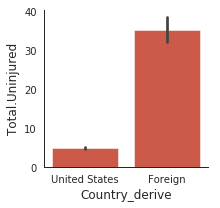

In [0]:
plot_categories(df,target='Total.Uninjured',cat='Country_derive')

### Check what kind of numeric data is there:
Big value - 销量大不一定反映真正的市场需求，也可能是各店面中介先优惠价屯行程

### Number of distinct values per fields

In [0]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,28732.000000,28723.000000,78026.000000,56668.000000,54169.000000,55347.000000,68840.000000
mean,37.590133,-93.507433,1.147054,0.832675,0.327198,0.514120,5.867432
std,12.316493,39.595652,0.447324,6.225796,1.375063,2.776149,29.444289
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.346597,-114.927223,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.147778,-94.371667,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.533889,-81.644722,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,177.557778,4.000000,349.000000,111.000000,380.000000,699.000000


### Review the same output, but by type of data

In [0]:
df_metadata.sort_values(by=['Datatype','Levels'])
describe_more(df).sort_values(by=['Datatype','Levels'],ascending=[True,True])

,Variable,Levels,Datatype
17,Number.of.Engines,5,float64
24,Total.Serious.Injuries,40,float64
25,Total.Minor.Injuries,63,float64
23,Total.Fatal.Injuries,124,float64
26,Total.Uninjured,371,float64
6,Latitude,19515,float64
7,Longitude,21017,float64
1,Investigation.Type,2,object
16,Amateur.Built,2,object
27,Weather.Condition,3,object


In [0]:
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

# Reference answer below

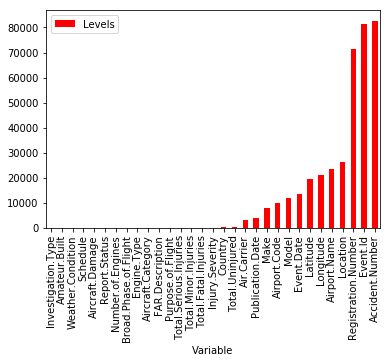

In [0]:
df_metadata.plot(kind='bar',x='Variable',y='Levels',color='red')
plt.show()

In [0]:
# Data Transformation

df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

print(df['Year'] >= 2016)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
4677    True
4678    True
4679    True
4680    True
4681    True
4682    True
4683    True
4684    True
4685    True
4686    True
4687    True
4688    True
4689    True
4690    True
4691    True
4692    True
4693    True
4694    True
4695    True
4696    True
4697    True
4698    True
4699    True
4700    True
4701    True
4702    True
4703    True
4704    True
4705    True
4706    True
Name: Year, Length: 4707, dtype: bool


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,Month,Day
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18,2018,12,16
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20,2018,12,15
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21,2018,12,13
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19,2018,12,13
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18,2018,12,11
5,20181210X21905,Accident,GAA19CA091,2018-12-10,"Chester, CT",United States,NaN,NaN,SNC,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,2018-12-13,2018,12,10
6,20181208X53536,Accident,GAA19CA090,2018-12-08,"Hesperia, CA",United States,34.376945,-117.316111,L26,HESPERIA,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-13,2018,12,8
7,20181206X45049,Accident,GAA19CA088,2018-12-05,"Cornelia, GA",United States,NaN,NaN,AJR,NaN,...,NaN,NaN,2.0,NaN,NaN,Preliminary,2018-12-13,2018,12,5
8,20181204X03049,Accident,GAA19CA086,2018-12-04,"Reno, NV",United States,39.658889,-119.865833,RTS,RENO/STEAD,...,NaN,NaN,2.0,IMC,NaN,Preliminary,2018-12-20,2018,12,4
9,20181212X01623,Accident,ERA19LA063,2018-12-04,"Moscow, PA",United States,41.326945,-75.591111,NaN,NaN,...,NaN,NaN,1.0,VMC,CRUISE,Preliminary,2018-12-19,2018,12,4


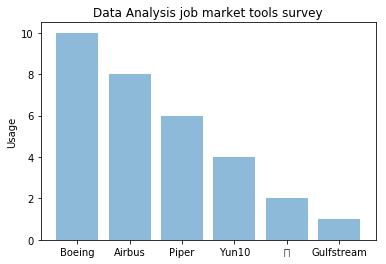

In [0]:


objects = ('Boeing','Airbus','Piper','Yun10','运','Gulfstream')
    #'SQL', 'Java', 'Python', 'Alteryx', 'Power BI', 'R')
y_pos = np.arange(len(objects))
#print(y_pos)
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Data Analysis job market tools survey')

plt.show()

In [0]:
print("\\")

\


两种过滤Data Frame办法

In [0]:
categories=df_metadata[df_metadata['Datatype']=="object"]['Variable']

Flag_category=df_metadata['Datatype']=="object"

print (categories)

countries=df['Country']

#countries=countries[~np.isnan(countries)]
countries.drop_duplicates( keep='first', inplace=True)
print("There are %s countries:"%countries.count())
print (countries)

1        Investigation.Type
16            Amateur.Built
27        Weather.Condition
20                 Schedule
11          Aircraft.Damage
29            Report.Status
28    Broad.Phase.of.Flight
18              Engine.Type
12        Aircraft.Category
19          FAR.Description
21        Purpose.of.Flight
10          Injury.Severity
5                   Country
22              Air.Carrier
30         Publication.Date
14                     Make
8              Airport.Code
15                    Model
3                Event.Date
9              Airport.Name
4                  Location
13      Registration.Number
0                  Event.Id
2           Accident.Number
Name: Variable, dtype: object
There are 178 countries:
0                         United States
16                         South Africa
20                            Indonesia
28                               Brazil
29                             Ethiopia
32                            Australia
37                   Dominican Re

/usr/local/lib/python3.6/dist-packages/pandas/core/base.py:1512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

## TOO LONG DNR

In [0]:
for c in categories:
    print(c , df[c].unique())

#df[df['first_name'].notnull() & (df['nationality'] == "USA")]

Investigation.Type ['Accident' 'Incident' nan]
Amateur.Built ['No' 'Yes' nan]
Weather.Condition [nan 'VMC' 'IMC' 'UNK']
Schedule [nan 'SCHD' 'NSCH' 'UNK']
Aircraft.Damage ['Substantial' 'Destroyed' 'Minor' nan]
Report.Status ['Preliminary' 'Foreign' 'Factual' 'Probable Cause']
Broad.Phase.of.Flight [nan 'APPROACH' 'TAKEOFF' 'CRUISE' 'LANDING' 'GO-AROUND' 'UNKNOWN' 'TAXI'
 'OTHER' 'DESCENT' 'MANEUVERING' 'STANDING' 'CLIMB']
Engine.Type [nan 'Reciprocating' 'Turbo Jet' 'Turbo Fan' 'Turbo Prop' 'Turbo Shaft'
 'Unknown' 'None' 'Electric' 'REC, ELEC' 'Hybrid Rocket' 'REC, TJ, TJ'
 'REC, TJ, REC, TJ' 'TJ, REC, REC, TJ']
Aircraft.Category ['Airplane' 'Helicopter' 'Gyroplane' nan 'Balloon' 'Unknown'
 'Weight-Shift' 'Glider' 'Ultralight' 'Powered Parachute' 'Blimp'
 'Powered-Lift' 'Gyrocraft' 'Rocket']
FAR.Description ['Part 91: General Aviation' 'Non-U.S., Non-Commercial'
 'Part 135: Air Taxi & Commuter' 'Part 137: Agricultural'
 'Non-U.S., Commercial' 'Part 133: Rotorcraft Ext. Load' 'Unknown

## <font color='red'>Will fail</font>

In [0]:
for c in categories:
    print(c , df[c].unique().sample(5))

AttributeError: ignored

In [0]:
df[countries]
   

ValueError: ignored

In [0]:
category_values(df, categories)
#print(countries)
#category_values(df, countries)


 Investigation.Type
Accident    79282
Incident     3345
Name: Investigation.Type, dtype: int64
Nulls:  1

 Amateur.Built
No     73946
Yes     8055
Name: Amateur.Built, dtype: int64
Nulls:  627

 Weather.Condition
VMC    73108
IMC     5781
UNK     1031
Name: Weather.Condition, dtype: int64
Nulls:  2708

 Schedule
UNK     4099
NSCH    3983
SCHD    3647
Name: Schedule, dtype: int64
Nulls:  70899

 Aircraft.Damage
Substantial    59650
Destroyed      17780
Minor           2606
Name: Aircraft.Damage, dtype: int64
Nulls:  2592

 Report.Status
Probable Cause    76093
Foreign            4503
Preliminary        1458
Factual             574
Name: Report.Status, dtype: int64
Nulls:  0

 Broad.Phase.of.Flight
LANDING        20115
TAKEOFF        15935
CRUISE         10966
MANEUVERING    10189
APPROACH        8010
TAXI            2413
CLIMB           2339
DESCENT         2278
GO-AROUND       1678
STANDING        1276
UNKNOWN          756
OTHER            170
Name: Broad.Phase.of.Flight, dtype: int64

ValueError: ignored

In [0]:
print(df.groupby(['Make','Amateur.Built']).count())
#print(df.groupby(['Weather.Condition','Aircraft.Damage']).count())


                                        Event.Id  Investigation.Type  \
Make                     Amateur.Built                                 
107.5 Flying Corporation Yes                   1                   1   
1200                     No                    1                   1   
177MF LLC                Yes                   1                   1   
1977 COLFER-CHAN         Yes                   1                   1   
1ST FTR GP               Yes                   1                   1   
2001 MCGIRL              Yes                   1                   1   
2003 Nash                Yes                   1                   1   
2007 Savage Air LLC      Yes                   1                   1   
3XTRIM                   No                    1                   1   
67 FLYING DUTCHMAN       Yes                   1                   1   
781569 INC               Yes                   1                   1   
85 MANISTA               Yes                   1                

In [0]:
producers = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'No'].unique() ]
amateurs  = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'Yes'].unique() ]

# -----------------------------------------------
# Function that fixes the null in amateur.built
def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
# Fix for Amateur.Built field      
am_built = df.apply(lambda x: fix_amateur_built(x['Amateur.Built'], x['Make']), axis=1)
df = df.assign(AmateurBuilt = am_built, index=df.index)

In [0]:
print(df.groupby(['Make','Model']).count())

                                               Event.Id  Investigation.Type  \
Make                     Model                                                
107.5 Flying Corporation One Design DR 107            1                   1   
1200                     G103                         1                   1   
177MF LLC                PITTS MODEL 12               1                   1   
1977 COLFER-CHAN         STEEN SKYBOLT                1                   1   
1ST FTR GP               FOCKE-WULF 190               1                   1   
2000 McCoy               Genesis                      1                   1   
2001 MCGIRL              QUESTAIR VENTURE             1                   1   
2003 Nash                Kitfox II                    1                   1   
2007 Savage Air LLC      EPIC LT                      1                   1   
3XTRIM                   450 ULTRA                    1                   1   
67 FLYING DUTCHMAN       D1/LFD-13                  

In [0]:
# Function that fixes the null in number.of.engines 
def fix_number_of_engines(noe, m):
    if noe >= 0:
        return noe
    else:
        # Setting number of engines at the mean number of engines for the producer
        r = np.round(df['Number.of.Engines'][df['Make']==m].mean())
        return r

# Setting 0 engines for balloons
df['Number.of.Engines'][df['Number.of.Engines'].isnull() & (df['Make'].str.contains('balloon', case=False))] = 0.0
# Correcting number of engines
num_engines = df.apply(lambda x: fix_number_of_engines(x['Number.of.Engines'], x['Make']), axis=1)
df = df.assign(NumberofEngines = num_engines, index=df.index)
# Still some null after number of engines correction
df['NumberofEngines'].fillna(1, inplace=True)

In [0]:
df=pd.DataFrame({"A":[14,4,5,4,1], 
                 "B":[5,2,54,3,2], 
                 "C":[20,20,7,3,8], 
                 "D":[14,3,6,2,6]}) 
df

In [0]:
def fix_engine_type(et, model):
    if type(et) == str:
        return et
    else:
        # Setting engine type at the mode of engines for the model
        e = (df['Engine.Type'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Engine.Type field      
en_type = df.apply(lambda x: fix_engine_type(x['Engine.Type'], x['Model']), axis=1)
df = df.assign(EngineType = en_type, index=df.index)

In [0]:
def fix_aircraft_category(cat, model):
    if type(cat) == str:
        return cat
    else:
        # Setting aircraft category at the mode of caterogories for the model
        e = (df['Aircraft.Category'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Aircraft.Category field      
aircraft_cat = df.apply(lambda x: fix_aircraft_category(x['Aircraft.Category'], x['Model']), axis=1)
df = df.assign(AircraftCategory = aircraft_cat, index=df.index)

In [0]:
# null damages can't be defined
df[df['Aircraft.Damage'].isnull()]
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# Fixing phase of flight nulls
df['Broad.Phase.of.Flight'].fillna('UNKNOWN', inplace=True)

# Fixing weather conditions
df['Weather.Condition'].fillna('UNK', inplace=True)

# null categories can't be defined
df['Aircraft.Category'].fillna('Unknown', inplace=True)

# can't define purpose of flight
df['Purpose.of.Flight'].fillna('Unknown', inplace=True)

# don't know ho to set missing schedules 
df['Schedule'].fillna('UNK', inplace=True)

# don't know ho to set missing FAR.Description
df['FAR.Description'].fillna('Unknown', inplace=True)

# don't know ho to set missing Aircraft.Damage
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# don't know ho to set missing Air Carriers
df['Air.Carrier'].fillna('Unknown', inplace=True)

# don't know ho to set missing Makers
df['Make'].fillna('UNKNOWN', inplace=True)

# don't know ho to set missing Models
df['Model'].fillna('Unknown', inplace=True)

# don't know ho to set missing airport names
df['Airport.Name'].fillna('Unknown', inplace=True)

# don't know ho to set missing Models
df['Airport.Code'].fillna('Unknown', inplace=True)

# don't know ho to set missing Locations
df['Location'].fillna('Unknown', inplace=True)

In [0]:
# How many still null
df.isnull().sum()

Event.Id                      0
Investigation.Type            1
Accident.Number               0
Event.Date                    0
Location                      0
Country                     507
Latitude                  53903
Longitude                 53912
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.Damage               0
Aircraft.Category             0
Registration.Number        3582
Make                          0
Model                         0
Amateur.Built               627
Number.of.Engines          4609
Engine.Type                3982
FAR.Description               0
Schedule                      0
Purpose.of.Flight             0
Air.Carrier                   0
Total.Fatal.Injuries      25967
Total.Serious.Injuries    28466
Total.Minor.Injuries      27288
Total.Uninjured           13795
Weather.Condition             0
Broad.Phase.of.Flight         0
Report.Status                 0
Publication.Date          14014
dtype: i

## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.